<a href="https://colab.research.google.com/github/satrio-hw/image-processing/blob/master/Pengolahan_Citra_UAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## R. Satrio H Wicaksono
### (0102517023)
#### Teknik Informatika, Universitas Al Azhar Indonesia

### Problem 1
Binarize the clean license plate image, the noisy license plate image, and the template images,
so that the large characters in the middle of the plate __appear as white and the background
appears as black.__ Choose the threshold by applying __Otsu’s method__ on the clean license plate
image, and use the same threshold for all binarization operations in this problem. Submit the
binarized clean and noisy license plate images and the binarized template images.

In [0]:
import cv2
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import copy

In [0]:
def licenseplaterecog(path):
    img = cv2.imread(path)
    grayimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    th = 0
    max_val=255

    ret, o1 = cv2.threshold(grayimg,th,max_val,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    ret, o2 = cv2.threshold(grayimg, th, max_val, cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)
    ret, o3 = cv2.threshold(grayimg, th, max_val, cv2.THRESH_TOZERO+ cv2.THRESH_OTSU)
    ret, o4 = cv2.threshold(grayimg, th, max_val, cv2.THRESH_TOZERO_INV+ cv2.THRESH_OTSU)
    ret, o5 = cv2.threshold(grayimg, th, max_val, cv2.THRESH_TRUNC+ cv2.THRESH_OTSU)

    output=[grayimg,o1,o2,o3,o4,o5]
    title=["original","binary","binary inv","tozero","tozero inv","trunc"]

    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.imshow(output[i],cmap=plt.cm.gray)
        plt.title(title[i])
        plt.xticks([])
        plt.yticks([])

    plt.show()
    
    return(output[2])


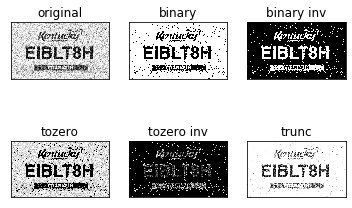

In [0]:
pathnoice="D:/MyDocuments/UAI/Grafikom dan Pengolahan Citra/Citra/UTS/hw3_data/hw3_data/hw3_license_plate_noisy.png"
pathclean="D:/MyDocuments/UAI/Grafikom dan Pengolahan Citra/Citra/UTS/hw3_data/hw3_data/hw3_license_plate_clean.png"    
matrix_noice_gray_ori=licenseplaterecog(pathnoice)


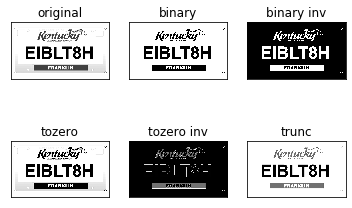

In [0]:
matrix_clean_gray_ori=licenseplaterecog(pathclean)

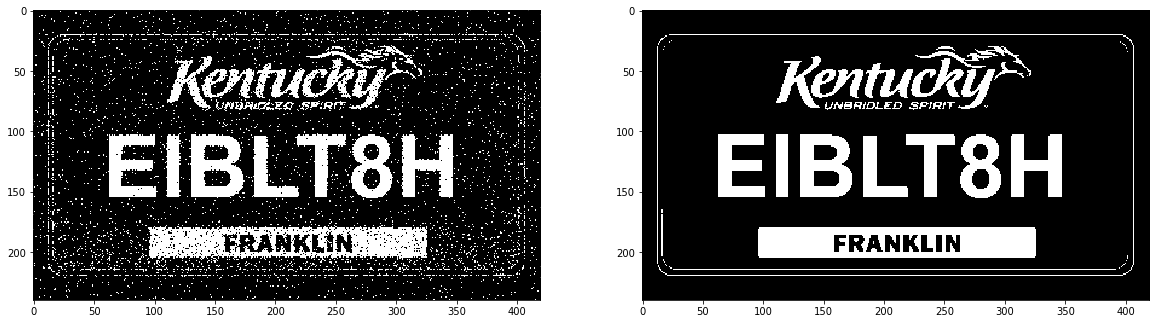

In [0]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.imshow(matrix_noice_gray_ori,cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(matrix_clean_gray_ori,cmap=plt.cm.gray)
plt.show()

In [0]:
matrix_noice_gray =list(itertools.chain.from_iterable(matrix_noice_gray_ori))
matrix_clean_gray =list(itertools.chain.from_iterable(matrix_clean_gray_ori))

__matrix_clean_gray__ adalah *binerisasi untuk clean plate image*<br>
__matrix_noice_gray__ adalah *binerisasi untuk noice plate image*<br>
Untuk lebih memudahkan dalam visualisasinya. Kedua gambar tersebut akan diubah kedalam data set pandas

In [0]:
pic_df_noice = pd.DataFrame(matrix_noice_gray)
pic_df_noice.columns=["GrayScale_Value"]
pic_df_noice.head()

,GrayScale_Value
0,0
1,0
2,0
3,0
4,0


In [0]:
pic_df_clean = pd.DataFrame(matrix_clean_gray)
pic_df_clean.columns=["GrayScale_Value"]
pic_df_clean.head()

,GrayScale_Value
0,0
1,0
2,0
3,0
4,0


perbandingan kedua gambar akan ditampilkan dalam histogram dibawah ini:

[Text(0.5, 0, 'Gray Scale Value (0-255)')]

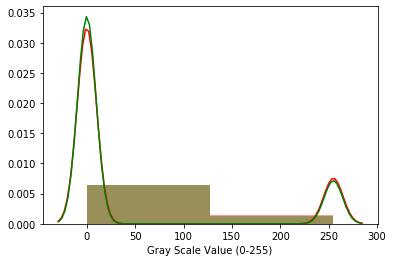

In [0]:
disp=sns.distplot(pic_df_noice,bins=2,color="r")
disp=sns.distplot(pic_df_clean,bins=2,color="g")
disp.set(xlabel="Gray Scale Value (0-255)")


Histogram merepresentasikan *density* dengan interval value 0-225 (gap/bins untuk tiap bar adalah 128 atau 255/*2*), maka :<br>
*density0 = Frequency/gap = ((how-many-0)/100800pixel)/128<br>
density255 = Frequency/gap = ((how-many-255)/100800pixel)/128*<br><br>

dari histogram diatas, diketahui meski terdapat beda jumlah pixel untuk value 0 dan 255 (*clean* memiliki pixel warna hitam sedikit lebih banyak dari *noice*), selisih antara keduanya relatif kecil secara frequensi, meski perbedaan amat terlihat ketika gambar ditampilkan

### Problem 2
Perform __character detection by erosion__ in the binarized clean license (MATLAB function:
_imerode_). To eliminate the effects of slight mismatches along the character boundaries,
compute a slightly eroded template which is erode(template, __3x3 square__), and then use the
eroded template as the SE in the erosion detector. For each template that generates a __nonzero
detection result__, dilate the eroded license plate image (MATLAB function: imdilate) by the
template for visualization purposes and submit the dilation result, like shown in the following
example for the template “B”. Which characters are detected by this approach? Are there any
false positive detections, and if so, why?

In [0]:
kernel = np.ones((3,3),np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

kernel berupa matrix __square 3x3__ yang berisi satu

In [0]:
img_erosion = cv2.erode(matrix_clean_gray_ori,kernel,iterations=1)
img_dilation = cv2.dilate(matrix_clean_gray_ori,kernel,iterations=1)

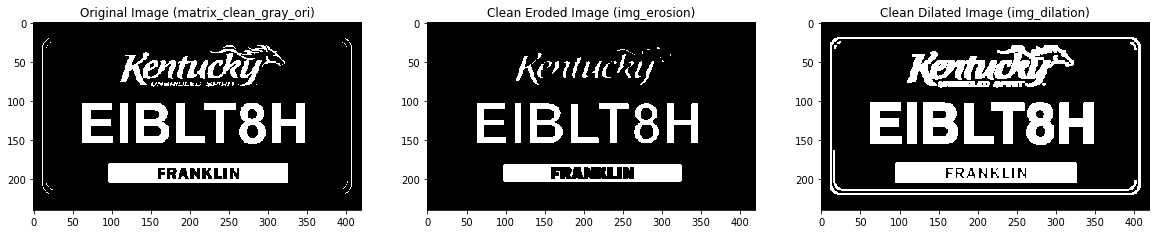

In [0]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.imshow(matrix_clean_gray_ori,cmap=plt.cm.gray)
plt.title("Original Image (matrix_clean_gray_ori)")

plt.subplot(1,3,2)
plt.imshow(img_erosion,cmap=plt.cm.gray)
plt.title("Clean Eroded Image (img_erosion)")

plt.subplot(1,3,3)
plt.imshow(img_dilation,cmap=plt.cm.gray)
plt.title("Clean Dilated Image (img_dilation)")
plt.show()

Untuk soal ini, tamplate yang digunakan adalah untuk huruf 'B' yang sebelumnya disimpan di lokasi dibawah:

In [0]:
pathtemplate="D:/MyDocuments/UAI/Grafikom dan Pengolahan Citra/Citra/UTS/hw3_data/hw3_data/hw3_character_templates/Templates/B.png"
template = cv2.imread(pathtemplate)
graytemp = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)

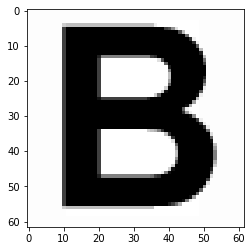

In [0]:
plt.imshow(graytemp,cmap=plt.cm.gray)
plt.show()
graytemp.shape
np.set_printoptions(threshold=np.inf)
#graytemp

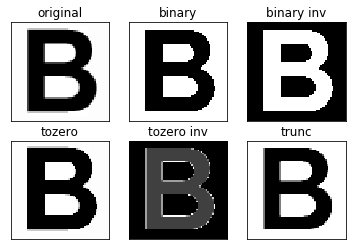

In [0]:
graytemp=licenseplaterecog(pathtemplate)

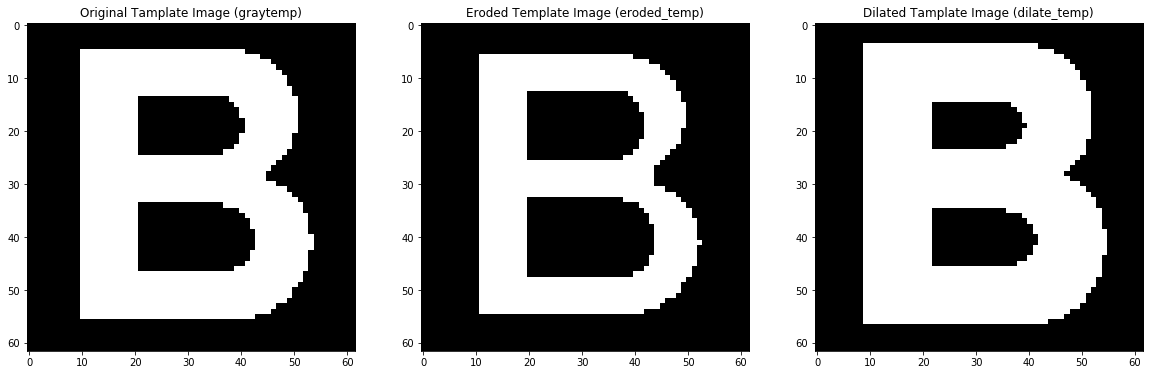

In [0]:
eroded_temp = cv2.erode(graytemp,kernel,iterations=1)
dilate_temp = cv2.dilate(graytemp,kernel,iterations=1)

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.imshow(graytemp,cmap=plt.cm.gray)
plt.title("Original Tamplate Image (graytemp)")

plt.subplot(1,3,2)
plt.imshow(eroded_temp,cmap=plt.cm.gray)
plt.title("Eroded Template Image (eroded_temp)")

plt.subplot(1,3,3)
plt.imshow(dilate_temp,cmap=plt.cm.gray)
plt.title("Dilated Tamplate Image (dilate_temp)")

plt.show()
#eroded_temp = np.where(eroded_temp == 155)

untuk mengetahui jumlah pixel dengan warna putih (value = 255) pada gambar original sebagai berikut:

In [0]:
thewhite=np.transpose(np.nonzero(graytemp))
len(thewhite)

1558

In [0]:
def makeitnormal(thewhite):
    factor_y=thewhite[0][0]
    factor_x=thewhite[0][1]
    linetoone=[]
    for i in range(len(thewhite)):
        linetoone.append([(thewhite[i][0]-factor_y),(thewhite[i][1]-factor_x)])
    result=[linetoone,factor_y,factor_x]
    return result

fungsi __makeitnormal__ berfungsi untuk mengubah value yang berada dalam parameter *thewhite* yang awalnya merupakan koordinat (y,x) untuk pixel non zero (warna putih), menjadi selisih baris dan selisih kolom untuk tiap pixel non-zero dengan acuan berupa pixel non-zero pertama yang ditemukan (pencarian dari kiri->kanan dan atas->bawah)

In [0]:
def cuting(source,y,x,iter_y,iter_x):
    init_y=0
    init_x=0
    return source[(init_y+iter_y):(y+iter_y),(init_x+iter_x):(x+iter_x)]

fungsi __cutting__ berfungsi untuk menampilkan potongan gambar yang diberikan di parameter dengan nilai y dan x tertentu

In [0]:
def display(image):
    plt.imshow(image,cmap=plt.cm.gray)
    plt.title("Display Function")
    plt.show()

fungsi __display__ berfungsi untuk menampilkan matrix yang diberikan di parameter dalam bentuk plot gambar

In [0]:
def init_clean():
    matrix_clean_gray_ori=licenseplaterecog(pathclean)
    return matrix_clean_gray_ori
def init_noice():
    matrix_noice_gray_ori=licenseplaterecog(pathnoice)
    return matrix_noice_gray_ori

fungsi __init_clean__ dan __init_clean__ berfungsi untuk mengembalikan matrix image clean dan noice ke bentuk awal sebelum dilakukan modifikasi apapun

In [0]:
def erosiondetector(img,eroded_img,threshold):
    dimen_y = eroded_img.shape[0]
    dimen_x = eroded_img.shape[1]
    iteration_y=0
    iteration_x=0
    prog=0
    koef_prog=threshold/(img.shape[1]-eroded_img.shape[1])
    
    flag=0
    count=0
    count1=0
    count0=0
    
    while dimen_x+iteration_x <= img.shape[1]:
        level=0
        #print("Level: ",level)
        while dimen_y+iteration_y <= img.shape[0]:
            level=1
            #print("Level: ",level)
#######################################################################################################################################################################
            cuted_img=cuting(img,dimen_y,dimen_x,iteration_y,iteration_x)
            

            thewhite_img=np.transpose(np.nonzero(cuted_img))
            thewhite_eroded=np.transpose(np.nonzero(eroded_img))
            
            upper_lim = len(thewhite_eroded)*2
            #print("limit:",upper_lim)
            
            if len(thewhite_img) >= len(thewhite_eroded) and len(thewhite_img)<upper_lim :
                #display(cuted_img)
                level=2
                #print("Level: ",level)
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------#
                norm_nonzero_img=makeitnormal(thewhite_img)
                #print (len(norm_nonzero_img[0]))
                norm_nonzero_eroded=makeitnormal(thewhite_eroded)
                #print (len(norm_nonzero_eroded[0]))

                same_white_pixel=[]
                for_count=0
                for_count=0
                count=len(norm_nonzero_eroded[0])
                
                notselected=[]
                for i in range(len(norm_nonzero_eroded[0])):
                    for_count+=1
                    #print(for_count)
                    level=3
                    #print("Level: ",level)
                    if norm_nonzero_eroded[0][i] in norm_nonzero_img[0]:
                        level=4.1
                        #print("Level: ",level)
                            
                        count-=1
                        same_white_pixel.append([(norm_nonzero_eroded[0][i][0]+norm_nonzero_img[1]+iteration_y),(norm_nonzero_eroded[0][i][1]+norm_nonzero_img[2]+iteration_x)])
                        flag=1
                        #count1+=1
                    else:
                        count-=1
                        notselected.append(norm_nonzero_eroded[0][i])
                        flag=0

                    #print("THE COUNT :",count," FLAG = ",flag)
                if len(notselected) != 0:
                    level=4.2
                        #print("Level: ",level)
                    flag=0
                        #count0+=1
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------#
                #print(len(norm_nonzero_eroded[0])," ",for_count)
                #print(notselected)
                if flag == 1:
                    level=5
                    #print("Level: ",level)
                    #display(cuted_img)
                    for i in range(len(same_white_pixel)):
                        level=6
                        #print("Level: ",level)
                        img[same_white_pixel[i][0]][same_white_pixel[i][1]] = 100
                    #display(img)
                flag=0
#######################################################################################################################################################################
            iteration_y+=threshold
            
        prog+=koef_prog
        print("Progress : %.4f"%prog)
                
        iteration_y=0
        iteration_x+=threshold
            

   # print(for_count)
    return flag

fungsi __erosiondetector__ akan mencari pixel non-zero pada paramerer *img* berdasarkan hasil dari gambar tamplate yang telah dierosi sebelumnya (parameter *eroded_img*). Parameter *eroded_img* digunakan sebagai acuan pengecekan selisih tiap pixel non-zero pada parameter *img*.<br><br>

Pengecekan akan dilakukan dengan mengambil sebagian dari *img* dengan dimensi yang sama seperti *eroded_img*.Pemotongan dilakukan dari atas kebawah, baru kemudian dari kiri ke kanan. Selisih antara hasil pemotongan yang satu dengan selanjutnya diatur pada parameter *threshold*, yang berisi angka integer merepresentasikan selisih perpindahan pixel tiap iterasinya.<br>
Pada fungsi terdapat variable *upper_lim* yang ditujukan untuk membatasi iterasi. Dengan adanya *upper_lim*, potongan gambar yang memiliki jumlah pixel non-zero lebih dari 2x *eroded_image* akan diabaikan. Value = 2 merupakan estimasi mengingat untuk tamplate yang tersedia, bila jumlah frekuensi pixel non-zero ditingkatkan 2-3x dari original, maka sudah akan mendominasi dari keseluruhan 3844 pixel yang tersesia pada potongan gambar yang di cek<br><br>

Fungsi ini juga akan langsung mengubah bagian gambar asli yang terdeteksi menggunakan metode deteksi erosi.<br>
ketika dijalankan, fungsi ini juga akan mengeluarkan output berupa progress yang dilakukan (dalam float)

##### Pengecekan pada gambar clean :

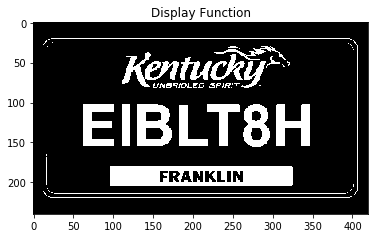

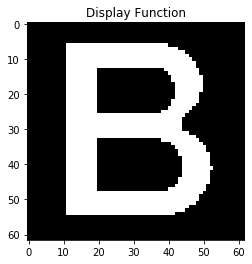

Progress : 0.0084
Progress : 0.0168
Progress : 0.0251
Progress : 0.0335
Progress : 0.0419
Progress : 0.0503
Progress : 0.0587
Progress : 0.0670
Progress : 0.0754
Progress : 0.0838
Progress : 0.0922
Progress : 0.1006
Progress : 0.1089
Progress : 0.1173
Progress : 0.1257
Progress : 0.1341
Progress : 0.1425
Progress : 0.1508
Progress : 0.1592
Progress : 0.1676
Progress : 0.1760
Progress : 0.1844
Progress : 0.1927
Progress : 0.2011
Progress : 0.2095
Progress : 0.2179
Progress : 0.2263
Progress : 0.2346
Progress : 0.2430
Progress : 0.2514
Progress : 0.2598
Progress : 0.2682
Progress : 0.2765
Progress : 0.2849
Progress : 0.2933
Progress : 0.3017
Progress : 0.3101
Progress : 0.3184
Progress : 0.3268
Progress : 0.3352
Progress : 0.3436
Progress : 0.3520
Progress : 0.3603
Progress : 0.3687
Progress : 0.3771
Progress : 0.3855
Progress : 0.3939
Progress : 0.4022
Progress : 0.4106
Progress : 0.4190
Progress : 0.4274
Progress : 0.4358
Progress : 0.4441
Progress : 0.4525
Progress : 0.4609
Progress :

In [0]:
#Clean Image
cp=[]
display(matrix_clean_gray_ori)
display(eroded_temp)
cp=erosiondetector(matrix_clean_gray_ori,eroded_temp,3)

##### Pengecekan pada gambar noice :

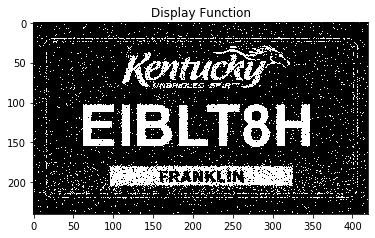

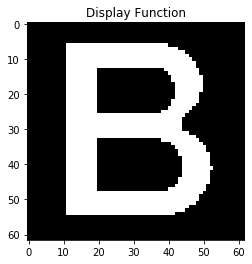

Progress : 0.0028
Progress : 0.0056
Progress : 0.0084
Progress : 0.0112
Progress : 0.0140
Progress : 0.0168
Progress : 0.0196
Progress : 0.0223
Progress : 0.0251
Progress : 0.0279
Progress : 0.0307
Progress : 0.0335
Progress : 0.0363
Progress : 0.0391
Progress : 0.0419
Progress : 0.0447
Progress : 0.0475
Progress : 0.0503
Progress : 0.0531
Progress : 0.0559
Progress : 0.0587
Progress : 0.0615
Progress : 0.0642
Progress : 0.0670
Progress : 0.0698
Progress : 0.0726
Progress : 0.0754
Progress : 0.0782
Progress : 0.0810
Progress : 0.0838
Progress : 0.0866
Progress : 0.0894
Progress : 0.0922
Progress : 0.0950
Progress : 0.0978
Progress : 0.1006
Progress : 0.1034
Progress : 0.1061
Progress : 0.1089
Progress : 0.1117
Progress : 0.1145
Progress : 0.1173
Progress : 0.1201
Progress : 0.1229
Progress : 0.1257
Progress : 0.1285
Progress : 0.1313
Progress : 0.1341
Progress : 0.1369
Progress : 0.1397
Progress : 0.1425
Progress : 0.1453
Progress : 0.1480
Progress : 0.1508
Progress : 0.1536
Progress :

In [0]:
#Noice Image
cp=[]
display(matrix_noice_gray_ori)
display(eroded_temp)
cp=erosiondetector(matrix_noice_gray_ori,eroded_temp,1)

##### Menampilkan hasil dari fungsi yang dijalankan :

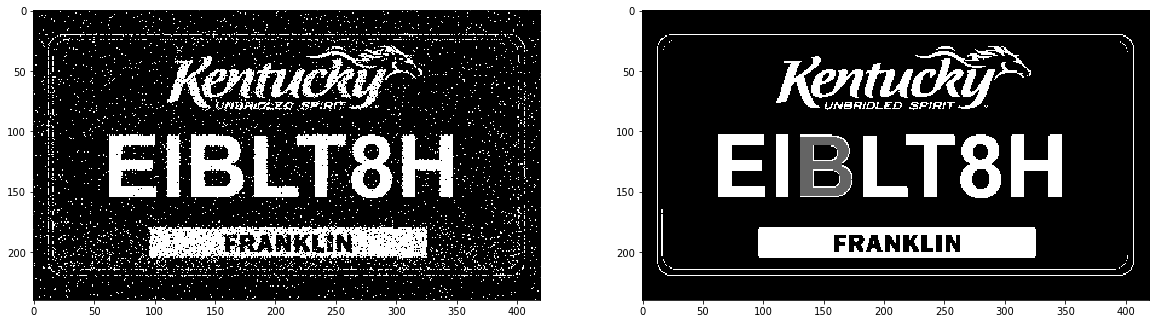

In [0]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.imshow(matrix_noice_gray_ori,cmap=plt.cm.gray)

plt.subplot(1,2,2)
plt.imshow(matrix_clean_gray_ori,cmap=plt.cm.gray)
plt.show()

Pada gambar diatas, terlihar bahwa fungsi yang dibuat *berhasil* mengidentifikasi bagian dari gambar *clean* yang sesuai dengan tamplate yang diberikan, sementara pada gambar *noice*, deteksi *tidak berhasil* dilakukan meski dengan nilai trashold = 1 (pengecekan tiap pixel dilakukan dengan selisih 1 pixel untuk tiap iterasi)<br><br>

__Hipotesis awal :__ pada gambar Noice, pixel huruf yang seharusnya putih solid, ternyata terdapat pixel yang memiliki value = 0. Pixel tersebut memiliki frekuensi kecil atau berjarak jauh satu dengan lainnya, sehingga tidak terlihat kasat mata

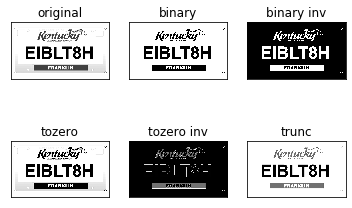

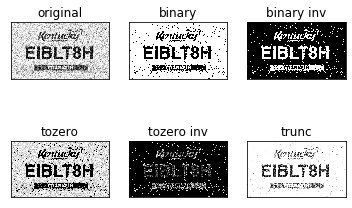

In [0]:
matrix_clean_gray_ori=init_clean()
matrix_noice_gray_ori=init_noice()

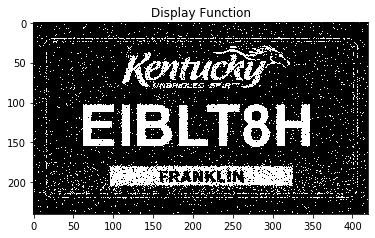

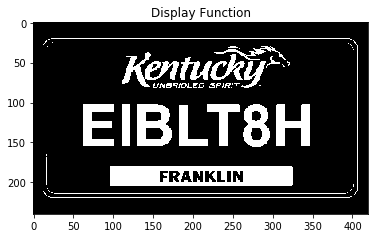

In [0]:
######################################################################################################################
display(matrix_noice_gray_ori)
display(matrix_clean_gray_ori)
######################################################################################################################